In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [7]:
df = pd.read_csv("../recordings/pupil_hr_log.csv")
df["pupil_radius"] = df["pupil_radius"].rolling(window=3, min_periods=1).mean()

In [8]:
df

,timestamp,frame_idx,elapsed_sec,pupil_x,pupil_y,pupil_radius,heart_rate
0,2025-06-05T17:22:11.559067,0,0.75,336.50,279.00,30.120000,75.38
1,2025-06-05T17:22:11.608263,1,0.80,336.50,279.00,29.940000,75.40
2,2025-06-05T17:22:11.633996,2,0.83,336.83,279.00,29.946667,75.41
3,2025-06-05T17:22:11.641996,3,0.83,336.50,279.00,29.933333,75.42
4,2025-06-05T17:22:11.650160,4,0.84,336.50,279.33,30.040000,75.42
...,...,...,...,...,...,...,...
1614,2025-06-05T17:23:10.690537,1614,59.88,348.33,292.67,30.386667,73.55
1615,2025-06-05T17:23:10.703743,1615,59.90,348.33,292.67,30.343333,73.55
1616,2025-06-05T17:23:10.719645,1616,59.91,348.50,292.67,30.320000,73.56
1617,2025-06-05T17:23:10.797701,1617,59.99,348.17,292.83,30.206667,73.60


In [9]:
def create_sequences(data, target, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)


In [10]:
radius = df["pupil_radius"].values
hr = df["heart_rate"].values


In [11]:
scaler = MinMaxScaler()
radius = scaler.fit_transform(radius.reshape(-1, 1)).flatten()

In [12]:
X, y = create_sequences(radius, hr, window_size=30)
X = X[..., np.newaxis]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
X_train

array([[[0.49872123],
        [0.4859335 ],
        [0.45780051],
        ...,
        [0.59846547],
        [0.57033248],
        [0.52941176]],

       [[0.32736573],
        [0.36317136],
        [0.37595908],
        ...,
        [0.70332481],
        [0.68797954],
        [0.61892583]],

       [[0.54219949],
        [0.58056266],
        [0.63171355],
        ...,
        [0.74168798],
        [0.76470588],
        [0.72890026]],

       ...,

       [[0.27109974],
        [0.38363171],
        [0.42966752],
        ...,
        [0.20716113],
        [0.25319693],
        [0.29667519]],

       [[0.63938619],
        [0.61381074],
        [0.64194373],
        ...,
        [0.76726343],
        [0.77237852],
        [0.77237852]],

       [[0.83375959],
        [0.87212276],
        [0.87212276],
        ...,
        [0.69053708],
        [0.69053708],
        [0.67519182]]])

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [16]:
import numpy as np
print(np.__version__)


1.26.4


In [17]:

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(30, 1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output
])

c:\Users\manit\anaconda3\envs\opencv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,401 (118.75 KB)

 Trainable params: 30,401 (118.75 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 62.6717 - mae: 6.3329 - val_loss: 15.1072 - val_mae: 3.5943
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 51.6538 - mae: 5.6984 - val_loss: 16.1948 - val_mae: 3.6626
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 56.5603 - mae: 6.1316 - val_loss: 14.5927 - val_mae: 3.5537
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 51.5070 - mae: 5.7626 - val_loss: 14.3989 - val_mae: 3.5341
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 48.5080 - mae: 5.6241 - val_loss: 15.0814 - val_mae: 3.5925
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 54.0589 - mae: 5.9718 - val_loss: 14.1700 - val_mae: 3.5039
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 56.7618 - mae: 6.0191 - val_loss: 15.3804 - val_mae: 3.6133
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 57.8744 - mae: 6.2454 - val_loss: 15.6687 - val_mae: 3.6318
Epoch 9/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/st

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


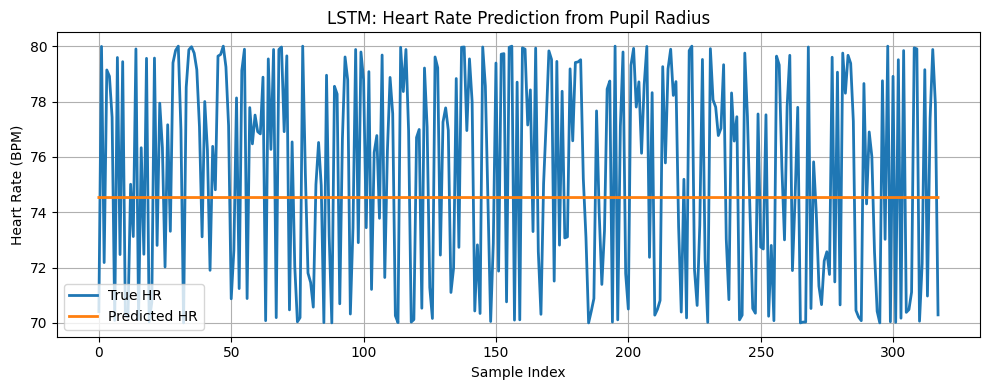

In [22]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test).flatten()

plt.figure(figsize=(10, 4))
plt.plot(y_test, label="True HR", linewidth=2)
plt.plot(y_pred, label="Predicted HR", linewidth=2)
plt.title("LSTM: Heart Rate Prediction from Pupil Radius")
plt.xlabel("Sample Index")
plt.ylabel("Heart Rate (BPM)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()